- Implementing a Generative Adversarial Network (GAN):
is a complex task, but I can provide you with a basic example using TensorFlow and Keras. GANs consist of two main components: a generator and a discriminator. The generator generates fake data, while the discriminator tries to distinguish between real and fake data. Both components are trained simultaneously in a min-max game.

2/2 [==============================] - 0s 2ms/step
Epoch 0, D Loss: 0.8426862955093384, G Loss: 0.908510684967041
1/1 [==============================] - 0s 58ms/step


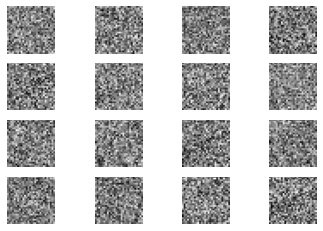

1/1 [==============================] - 0s 17ms/step


In [4]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


# Define the generator model
def build_generator(latent_dim):
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(784, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

# Define the discriminator model
def build_discriminator(img_shape):
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=img_shape))
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Define hyperparameters
latent_dim = 100
img_shape = (28, 28, 1)

# Build and compile the discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build and compile the generator
generator = build_generator(latent_dim)
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Build and compile the GAN
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Load the MNIST dataset
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 127.5 - 1.0
x_train = np.expand_dims(x_train, axis=-1)

# Training loop
batch_size = 64
epochs = 50

for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_imgs = generator.predict(noise)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, real_labels)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")
    # Plot generated images at specific intervals
    if epoch % 1000 == 0:
        noise = np.random.normal(0, 1, (16, latent_dim))
        gen_imgs = generator.predict(noise) * 0.5 + 0.5  # Denormalize
        fig, axs = plt.subplots(4, 4)
        cnt = 0
        for i in range(4):
            for j in range(4):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        plt.show()


1/1 [==============================] - 0s 17ms/step


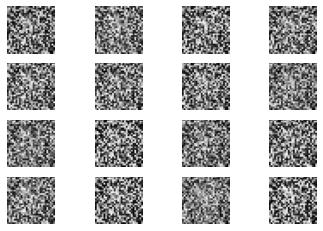

In [8]:

# Generate and save generated images
noise = np.random.normal(0, 1, (16, latent_dim))
gen_imgs = generator.predict(noise) * 0.5 + 0.5  # Denormalize
fig, axs = plt.subplots(4, 4)
cnt = 0
for i in range(4):
    for j in range(4):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1

plt.show()